In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [111]:
def day_counter(df, bool_col, date_col):
    '''
    El propósito de esta función es contar el número de días que han pasado desde que se activó una columna booleana.

    Parámetros:
    df: DataFrame
    bool_col: str, nombre de la columna booleana en el DataFrame.
    date_col: str, nombre de la columna de fecha en el DataFrame.

    Retorna:
    df: DataFrame con una nueva columna que cuenta el número de días que han pasado desde que se activó la columna booleana.
    '''

    df[date_col] = pd.to_datetime(df[date_col])
    df[bool_col] = df[bool_col].astype(int)
    df.sort_values(by=[date_col], inplace=True)

    # Obtener el primer dia con un 1
    last_date = df.loc[df[bool_col] == 1, date_col].iloc[0]

    # Obtener la primer posicion con un 1
    first_pos = df[bool_col].idxmax()

    for i in range(len(df)):
        if i < first_pos:
            df.loc[i, 'days_since'] = 0
        else:
            if df.loc[i, bool_col] == 1:
                df.loc[i, 'days_since'] = 0
                last_date = df.loc[i, date_col]
            else:
                df.loc[i, 'days_since'] = (df.loc[i, date_col] - last_date).days

    return df

test_df = pd.DataFrame({
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'bool': [0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
})

test_df = day_counter(test_df, 'bool', 'date')
print(test_df)

        date  bool  days_since
0 2021-01-01     0         0.0
1 2021-01-02     0         0.0
2 2021-01-03     1         0.0
3 2021-01-04     1         0.0
4 2021-01-05     1         0.0
5 2021-01-06     0         1.0
6 2021-01-07     0         2.0
7 2021-01-08     1         0.0
8 2021-01-09     1         0.0
9 2021-01-10     0         1.0


Fitteando una regresión lineal agrupada por:  grupo
Regresión del grupo A


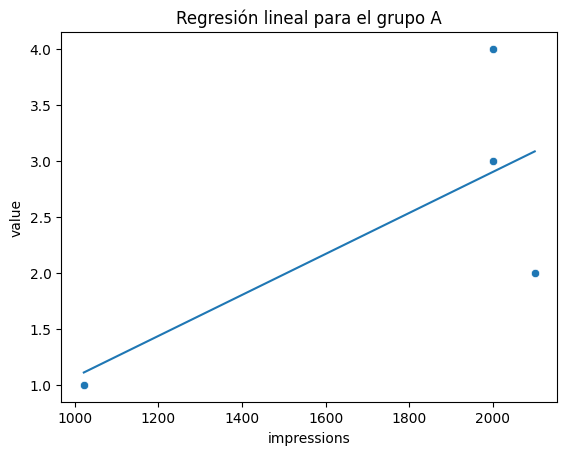

R2 score: 0.5189932834731048
---------------------------------------------
Prediciendo valores para X_test
Regresión del grupo B


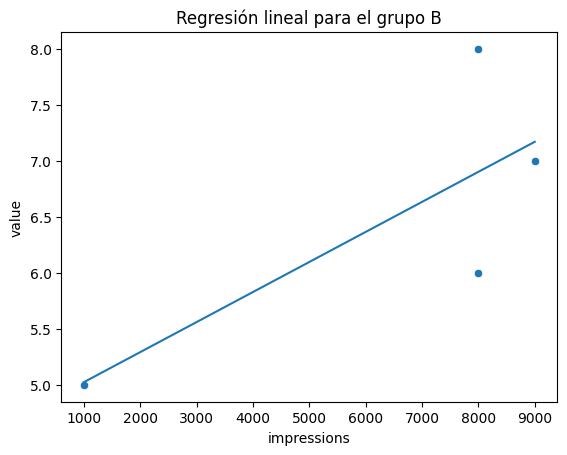

R2 score: 0.5902439024390244
---------------------------------------------
Prediciendo valores para X_test
Regresión del grupo C


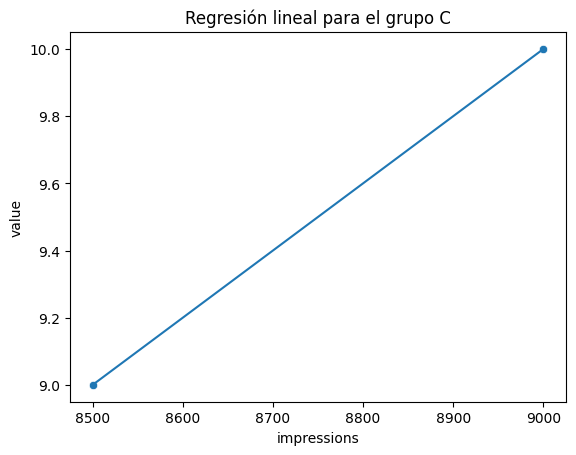

R2 score: 1.0
---------------------------------------------
Prediciendo valores para X_test


In [168]:
def fit_linear_regression(df, X, y, group = False, groupping_variable='', intercept=True, plot=False, pred= False, X_test= None):
    '''
    El propósito de esta función es ajustar un modelo de regresión lineal a un conjunto de datos.
    Puede ser útil si buscamos encontrar una relación lineal entre dos o más variables.
    Por ejemplo, encontrar la tendencia de los datos en el tiempo para diferentes subconjuntos de datos.
    En caso de no agrupar, se ajustará un modelo de regresión lineal a todos los datos.

    Parámetros:
    df: DataFrame
    X: str, nombre de la columna que se utilizará como variable independiente. (Puede ser una lista de columnas)
    y: str, nombre de la columna que se utilizará como variable dependiente.
    group: bool, si se quiere ajustar un modelo de regresión lineal para diferentes subconjuntos de datos.
    groupping_variable: str, nombre de la columna que se utilizará para agrupar los datos. 
        Por ejemplo, si elegimos por año, se ajustará un modelo de regresión lineal para cada año.
    intercept: bool, si se quiere incluir el intercepto en el modelo.
    plot: bool, si se quiere graficar la relación entre las variables.
    pred: bool, si se quiere predecir los valores de y para un conjunto de datos de test.
    X_test: DataFrame, conjunto de datos de prueba para evaluar el modelo. 
        (El modelo va a predecir los valores para X_test usando los coeficientes ajustados en el conjunto de entrenamiento)


    Retorna:
    df: DataFrame con una nueva columna que contiene las predicciones del modelo de regresión lineal.
    X_test: DataFrame con una nueva columna que contiene las predicciones del modelo de regresión lineal.
    '''

    if group == False:
        print('Fitteando una regresión lineal en todo el conjunto de datos (sin agrupaciones)')
        X_cols = df[X]
        y_cols = df[y]

        model = LinearRegression().fit(X_cols, y_cols)
        df['linear_regression_prediction'] = model.predict(X_cols)
        

        if plot == True:
            if len(X_cols.columns) == 1:
                sns.scatterplot(x=X_cols.iloc[:, 0], y=y_cols, data=df)
                sns.lineplot(x=X_cols.iloc[:, 0], y=df['linear_regression_prediction'], data=df)
                plt.title('Regresión lineal')
                plt.show()
            else:
                print('No se puede graficar la relación entre más de dos variables')
        print(f'R2 score: {r2_score(y_cols, df["linear_regression_prediction"])}')

        if pred == True:
            print('Prediciendo valores para X_test')
            X_test = X_test[X]
            X_test['linear_regression_prediction'] = model.predict(X_test)
            
            return df, X_test
        else:

            return df
        
    else:
        temp_df = df.copy()
        print('Fitteando una regresión lineal agrupada por: ', groupping_variable)

        for group in temp_df[groupping_variable].unique():
            print(f'Regresión del grupo {group}')
            df_groupped = temp_df[temp_df[groupping_variable] == group]
            X_cols = df_groupped[X]
            y_cols = df_groupped[y]

            model = LinearRegression().fit(X_cols, y_cols)
            df.loc[df[groupping_variable] == group, f'linear_regression_prediction_{groupping_variable}'] = model.predict(X_cols)
            df_groupped['linear_regression_prediction'] = model.predict(X_cols)

            if plot == True:
                if len(X_cols.columns) == 1:
                    sns.scatterplot(x=X_cols.iloc[:, 0], y=y_cols, data=df_groupped)
                    sns.lineplot(x=X_cols.iloc[:, 0], y='linear_regression_prediction', data=df_groupped)
                    plt.title(f'Regresión lineal para el grupo {group}')
                    plt.show()
                else:
                    print('No se puede graficar la relación entre más de dos variables')
            print(f'R2 score: {r2_score(y_cols, df_groupped["linear_regression_prediction"])}')

            print('---------------------------------------------')

            if pred:
                print('Prediciendo valores para X_test')
                X_test_groupped = X_test.copy()
                X_test_groupped = X_test_groupped.loc[X_test_groupped[groupping_variable] == group, X]
                X_test.loc[X_test[groupping_variable] == group, 'linear_regression_prediction'] = model.predict(X_test_groupped)

        if pred:
            return df, X_test
        else:
            return df

## Ejemplo de uso 
df = pd.DataFrame({
    'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'],
    'investment': [100, 100, 400, 400, 500, 600, 500, 800, 100, 100],
    'impressions': [1022, 2100, 2000, 2000, 1000, 8000, 9000, 8000, 8500, 9000],
    'grupo': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C'],
    'value': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# Dataframe que usaremos para predecir
test_df = pd.DataFrame({
    'investment': [100, 200, 100, 400, 500],
    'impressions': [1000, 4000, 1000, 4000, 5000],
    'grupo': ['A', 'A', 'B', 'B', 'C']
})

df, test_df= fit_linear_regression(df, ['impressions'], 'value', group=True, groupping_variable='grupo' ,plot=True, pred=True, X_test=test_df)
